# **데이터 탐색 및 주제**

**건강검진 샘플 데이터를 이용하여 BMI(비만도)를 예측하고 분류해 보자.**


- 2020년 건강검진정보 샘플을 이용한 분류   
- 분석에 사용할 데이터 정보  
 * Obesity: 비만정도 (BMI=25기준) --> **종속변수** (2개의 class)  
   * Y (Yes 비만) BMI>=25
   * N (No 비만 아님)  BMI<25
 * BMI: 비만도 (체중/키^2) --> **파생변수**
    
 * 나머지 32개 변수들 --> **독립변수**
   * Index(['drk_No', 'drk_Yes', 'smk_No', 'smk_NotNow', 'smk_Yes', 'sex_F',
       'sex_M', 'city Name', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'inspec_yn', 'cavity', 'ttr'],






In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=b179b42d80f8f86b293efde22691d2835e7f77da47aa4fd8750c9463205e4f07
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt  # Matplotlib의 pyplot 로딩하기

In [ ]:
import pandas as pd
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3학년-2학기 /아비혁-중간/실습파일(csv)/health_data.csv")

print(health.columns)  #데이터의 열 확인
display(health.info())  #데이터의 전체 행 수와 변수들의 척도 확인 
display(health.head()) #데이터에서 5개 행만 확인   

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
health.describe() #수치형 척도의 변수들의 기술통계량을 보여줌

#단 기준년도, 가입자일련번호, 시도코드, 연령대코드는 값이 실질적으로 수치 값이 아니라 문자형 값을 숫자 값으로 적었기 때문에 수치형 척도로서 의미가 없음 

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


# **데이터전처리**
- 결측치(NA)가 존재하는 행 제거
- '데이터공개일자',  '기준년도',  '가입자일련번호' 열 제거(유의미한 변수가 아님)
- 변수 명 영어로 변환 --> 편의성 및 추후 중요변수 시각화할 때 한글깨짐 방지 위해서
- 파생변수(BMI=비만도) 추가  
- 종속변수(Obesity=비만) 추가 --> BMI>=25면 비만, BMI<25면 비만 아님
- object척도 변수(성별코드, 흡연상태, 음주여부)를 one-hot-encoding 실행 --> **종속변수 Obesity만 object 척도로 만들기 위함**
- 분류 모델에 적용할 최종적인 데이터 'health' 생성

**결측치(NA)가 존재하는 행 제거**

In [ ]:
health_2 = health.dropna(axis=0) #결측치가 존재하는 행 제거(axis=1은 열)
health_2.info() #10000개의 행 중에서 결측치가 존재하는 행을 제거하여 총 1249행이 됨 
display(health_2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         1249 non-null   int64  
 1   가입자일련번호      1249 non-null   int64  
 2   시도코드         1249 non-null   int64  
 3   성별코드         1249 non-null   object 
 4   연령대코드(5세단위)  1249 non-null   int64  
 5   신장(5Cm단위)    1249 non-null   int64  
 6   체중(5Kg 단위)   1249 non-null   int64  
 7   허리둘레         1249 non-null   float64
 8   시력(좌)        1249 non-null   float64
 9   시력(우)        1249 non-null   float64
 10  청력(좌)        1249 non-null   int64  
 11  청력(우)        1249 non-null   int64  
 12  수축기혈압        1249 non-null   float64
 13  이완기혈압        1249 non-null   float64
 14  식전혈당(공복혈당)   1249 non-null   float64
 15  총콜레스테롤       1249 non-null   float64
 16  트리글리세라이드     1249 non-null   float64
 17  HDL콜레스테롤     1249 non-null   float64
 18  LDL콜레스테롤     1249 non-null   float64
 19  혈색소   

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,2020,9955,30,M,9,180,70,87.5,1.2,0.9,...,0.9,22.0,21.0,19.0,No,Yes,1,0.0,1.0,12/29/2021
9963,2020,9964,41,F,13,160,75,107.4,0.8,0.8,...,0.8,20.0,15.0,14.0,No,Yes,1,1.0,1.0,12/29/2021
9965,2020,9966,45,F,12,155,60,80.0,1.5,1.0,...,0.6,22.0,9.0,29.0,No,No,1,0.0,0.0,12/29/2021
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,0.7,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,12/29/2021


**'데이터공개일자',  '기준년도',  '가입자일련번호' 열 제거**

In [ ]:
health_2=health_2.drop(['데이터공개일자' ,'기준년도', '가입자일련번호'], axis='columns')  
#'데이터공개일자', '기준년도', '가입자일련번호'  컬럼 제거 ---> 의미없는 변수 
display(health_2)
health_2.info()  #31개의 컬럼에서 3개 제거해서 'total 28 columns'

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,1,0.0,1.0
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1,1.0,1.0
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,1,0.0,0.0
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도코드         1249 non-null   int64  
 1   성별코드         1249 non-null   object 
 2   연령대코드(5세단위)  1249 non-null   int64  
 3   신장(5Cm단위)    1249 non-null   int64  
 4   체중(5Kg 단위)   1249 non-null   int64  
 5   허리둘레         1249 non-null   float64
 6   시력(좌)        1249 non-null   float64
 7   시력(우)        1249 non-null   float64
 8   청력(좌)        1249 non-null   int64  
 9   청력(우)        1249 non-null   int64  
 10  수축기혈압        1249 non-null   float64
 11  이완기혈압        1249 non-null   float64
 12  식전혈당(공복혈당)   1249 non-null   float64
 13  총콜레스테롤       1249 non-null   float64
 14  트리글리세라이드     1249 non-null   float64
 15  HDL콜레스테롤     1249 non-null   float64
 16  LDL콜레스테롤     1249 non-null   float64
 17  혈색소          1249 non-null   float64
 18  요단백          1249 non-null   float64
 19  혈청크레아티

**변수 명 영어로 변환**

In [ ]:
health_2.rename(columns={'시도코드':'city Name',  '연령대코드(5세단위)':'age', '신장(5Cm단위)':'height', '체중(5Kg 단위)':'weight', '수축기혈압':'systolic blood pressure', '이완기혈압':'diastolic blood pressure',
'성별코드':'sex', '허리둘레':'waist', '시력(좌)':'sight_left', '치아우식증유무':'cavity', 
 '시력(우)':'sight_right', '청력(좌)':'hear_left', '청력(우)':'hear_right', '식전혈당(공복혈당)':'blds'
,'총콜레스테롤':'tot_choice', '트리글리세라이드':'triglyceride', 'HDL콜레스테롤':'hdl_chole', 'LDL콜레스테롤':'ldl_chole', 
'혈색소':'hmg', '요단백':'olig_prote_cd', '혈청크레아티닌':'creatinine', '(혈청지오티)AST':'sgot_ast',
'(혈청지오티)ALT':'sgpt_alt', '감마지티피':'gamma_gtp', '흡연상태':'smk', '음주여부':'drk', '구강검진수검여부':'inspec_yn',
'치석':'ttr'}, inplace=True)

display(health_2)
health_2.columns

#전체 28개의 컬럼 이름을 영어로 변환 

,city Name,sex,age,height,weight,waist,sight_left,sight_right,hear_left,hear_right,...,olig_prote_cd,creatinine,sgot_ast,sgpt_alt,gamma_gtp,smk,drk,inspec_yn,cavity,ttr
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,1,0.0,1.0
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1,1.0,1.0
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,1,0.0,0.0
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0


Index(['city Name', 'sex', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'smk', 'drk', 'inspec_yn',
       'cavity', 'ttr'],
      dtype='object')

**파생변수(BMI=비만도)추가**  
* 비만도=체중/키^2

In [ ]:
health_2['BMI']=(health_2['weight']/health_2['height']**2)*10000
display(health_2)

,city Name,sex,age,height,weight,waist,sight_left,sight_right,hear_left,hear_right,...,creatinine,sgot_ast,sgpt_alt,gamma_gtp,smk,drk,inspec_yn,cavity,ttr,BMI
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,29.384757
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,25.390625
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,20.811655
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,24.973985
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,23.875115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,0.9,22.0,21.0,19.0,No,Yes,1,0.0,1.0,21.604938
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,0.8,20.0,15.0,14.0,No,Yes,1,1.0,1.0,29.296875
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,0.6,22.0,9.0,29.0,No,No,1,0.0,0.0,24.973985
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,0.7,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,27.681661


**종속변수(Obesity=비만) 추가**

In [ ]:
import numpy as np
health_2['Obesity']=np.where(health_2['BMI']>=25, 'Y' ,'N')  
#조건을 부여해서 BMI가 25이상이면 비만(Y)으로 25 미만이면 비만 아님(N)의 값을 갖는 'Obesity' 변수 추가 
display(health_2)

,city Name,sex,age,height,weight,waist,sight_left,sight_right,hear_left,hear_right,...,sgot_ast,sgpt_alt,gamma_gtp,smk,drk,inspec_yn,cavity,ttr,BMI,Obesity
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,29.384757,Y
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,25.390625,Y
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,24.0,14.0,12.0,No,No,1,0.0,0.0,20.811655,N
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,33.0,22.0,29.0,No,Yes,1,0.0,0.0,24.973985,N
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,28.0,20.0,43.0,No,Yes,1,0.0,0.0,23.875115,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,22.0,21.0,19.0,No,Yes,1,0.0,1.0,21.604938,N
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,20.0,15.0,14.0,No,Yes,1,1.0,1.0,29.296875,Y
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,22.0,9.0,29.0,No,No,1,0.0,0.0,24.973985,N
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,27.681661,Y


**성별코드, 흡연상태, 음주여부 one-hot-encoding 실행**

In [ ]:
health_2.info()  # object 척도인 sex(성별코드), smk(흡연상태), drk(음주여부)를 one-hot-encoding 실행 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city Name                 1249 non-null   int64  
 1   sex                       1249 non-null   object 
 2   age                       1249 non-null   int64  
 3   height                    1249 non-null   int64  
 4   weight                    1249 non-null   int64  
 5   waist                     1249 non-null   float64
 6   sight_left                1249 non-null   float64
 7   sight_right               1249 non-null   float64
 8   hear_left                 1249 non-null   int64  
 9   hear_right                1249 non-null   int64  
 10  systolic blood pressure   1249 non-null   float64
 11  diastolic blood pressure  1249 non-null   float64
 12  blds                      1249 non-null   float64
 13  tot_choice                1249 non-null   float64
 14  triglyce

In [ ]:
x1=health_2[['drk']]
x2=health_2[['smk']]
x3=health_2[['sex']]

In [ ]:
x1_dum=pd.get_dummies(x1)
x2_dum=pd.get_dummies(x2)
x3_dum=pd.get_dummies(x3)

In [ ]:
display(x1_dum) #음주여부 원핫인코딩

,drk_No,drk_Yes
6,0,1
16,0,1
21,1,0
27,0,1
47,0,1
...,...,...
9954,0,1
9963,0,1
9965,1,0
9967,0,1


In [ ]:
display(x2_dum) #금주여부 원핫인코딩 

,smk_No,smk_NotNow,smk_Yes
6,0,0,1
16,1,0,0
21,1,0,0
27,1,0,0
47,1,0,0
...,...,...,...
9954,1,0,0
9963,1,0,0
9965,1,0,0
9967,0,1,0


In [ ]:
display(x3_dum) #성별 원핫인코딩 

,sex_F,sex_M
6,0,1
16,0,1
21,1,0
27,0,1
47,0,1
...,...,...
9954,0,1
9963,1,0
9965,1,0
9967,0,1


**concat(데이터 합치기) 함수를 이용하여 분류 모델에 적용할 최종 데이터 생성**

In [ ]:
health_2.columns

Index(['city Name', 'sex', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'smk', 'drk', 'inspec_yn',
       'cavity', 'ttr', 'BMI', 'Obesity'],
      dtype='object')

In [ ]:
a=health_2[[ 'city Name', 'age', 'height', 'weight', 'waist',
       'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'systolic blood pressure', 'diastolic blood pressure', 'blds',
       'tot_choice', 'triglyceride', 'hdl_chole', 'ldl_chole', 'hmg',
       'olig_prote_cd', 'creatinine', 'sgot_ast', 'sgpt_alt', 'gamma_gtp',
         'inspec_yn', 'cavity', 'ttr', 'BMI', 'Obesity']]   #음주여부, 흡연상태, 성별코드 제외
a.info()  # 총 27개의 컬럼

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city Name                 1249 non-null   int64  
 1   age                       1249 non-null   int64  
 2   height                    1249 non-null   int64  
 3   weight                    1249 non-null   int64  
 4   waist                     1249 non-null   float64
 5   sight_left                1249 non-null   float64
 6   sight_right               1249 non-null   float64
 7   hear_left                 1249 non-null   int64  
 8   hear_right                1249 non-null   int64  
 9   systolic blood pressure   1249 non-null   float64
 10  diastolic blood pressure  1249 non-null   float64
 11  blds                      1249 non-null   float64
 12  tot_choice                1249 non-null   float64
 13  triglyceride              1249 non-null   float64
 14  hdl_chol

In [ ]:
health=pd.concat([x1_dum, x2_dum, x3_dum, a], axis=1) #pd.concat 함수 이용해서 분류 모델에 적용할 최종적인 데이터 프레임 health 만들기
display(health)
health.info()  #종속변수 Obesity만 object 척도 #총 34개의 컬럼 

,drk_No,drk_Yes,smk_No,smk_NotNow,smk_Yes,sex_F,sex_M,city Name,age,height,...,olig_prote_cd,creatinine,sgot_ast,sgpt_alt,gamma_gtp,inspec_yn,cavity,ttr,BMI,Obesity
6,0,1,0,0,1,0,1,44,9,165,...,1.0,0.7,18.0,20.0,35.0,1,0.0,1.0,29.384757,Y
16,0,1,1,0,0,0,1,30,11,160,...,1.0,1.0,29.0,54.0,24.0,1,0.0,1.0,25.390625,Y
21,1,0,1,0,0,1,0,41,11,155,...,1.0,0.8,24.0,14.0,12.0,1,0.0,0.0,20.811655,N
27,0,1,1,0,0,0,1,11,17,155,...,1.0,1.4,33.0,22.0,29.0,1,0.0,0.0,24.973985,N
47,0,1,1,0,0,0,1,26,16,165,...,1.0,1.0,28.0,20.0,43.0,1,0.0,0.0,23.875115,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,0,1,1,0,0,0,1,30,9,180,...,1.0,0.9,22.0,21.0,19.0,1,0.0,1.0,21.604938,N
9963,0,1,1,0,0,1,0,41,13,160,...,1.0,0.8,20.0,15.0,14.0,1,1.0,1.0,29.296875,Y
9965,1,0,1,0,0,1,0,45,12,155,...,1.0,0.6,22.0,9.0,29.0,1,0.0,0.0,24.973985,N
9967,0,1,0,1,0,0,1,11,12,170,...,1.0,0.7,27.0,36.0,66.0,1,0.0,2.0,27.681661,Y


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   drk_No                    1249 non-null   uint8  
 1   drk_Yes                   1249 non-null   uint8  
 2   smk_No                    1249 non-null   uint8  
 3   smk_NotNow                1249 non-null   uint8  
 4   smk_Yes                   1249 non-null   uint8  
 5   sex_F                     1249 non-null   uint8  
 6   sex_M                     1249 non-null   uint8  
 7   city Name                 1249 non-null   int64  
 8   age                       1249 non-null   int64  
 9   height                    1249 non-null   int64  
 10  weight                    1249 non-null   int64  
 11  waist                     1249 non-null   float64
 12  sight_left                1249 non-null   float64
 13  sight_right               1249 non-null   float64
 14  hear_lef

N    774
Y    475
Name: Obesity, dtype: int64


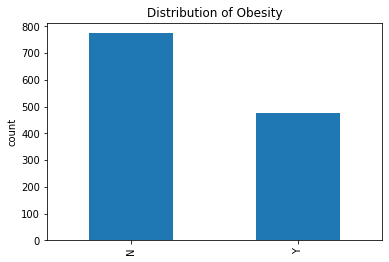

In [ ]:
from matplotlib import pyplot as plt

print(health['Obesity'].value_counts())

health['Obesity'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of Obesity')
plt.show()

# **의사결정나무 (Decision tree) 모델**

### **DecisionTreeClassifier** 

In [ ]:
health.columns

Index(['drk_No', 'drk_Yes', 'smk_No', 'smk_NotNow', 'smk_Yes', 'sex_F',
       'sex_M', 'city Name', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'inspec_yn', 'cavity', 'ttr',
       'BMI', 'Obesity'],
      dtype='object')

In [ ]:
health.columns[0:32]  #분류모델에 적용할 독립변수들 
# 종속변수 'Obesity' 는 파생변수 'BMI' 에서 나온 변수이기 때문에 과한 영향을 방지하기 위해 'BMI'는 독립변수에서 제외 

Index(['drk_No', 'drk_Yes', 'smk_No', 'smk_NotNow', 'smk_Yes', 'sex_F',
       'sex_M', 'city Name', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'inspec_yn', 'cavity', 'ttr'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.loc[:, 'drk_No':'ttr']  # 종속변수 'Obesity'와 파생변수 'BMI' 를 제외한 나머지 변수들 
y = health.loc[:, 'Obesity']   # target 변수(종속변수) 'Obesity'

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#의사결정나무 모델의 디폴트 값으로 진행하면 학습용 데이터가 100으로 과적합 상태가 발생됨 

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.978


In [ ]:
# 의사결정나무의 깊이를 제한하여 시험용 데이터에 대한 성능이 향상되게 함(과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree= DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

# max_depth=k (시험용 데이터의 정확도가 가장 높은 수로 선택)
# k=1--> 0.808 / k=2--> 0.808 / k=3--> 0.879 / k=4--> 0.879 / k=5--> 0.939 / k=6--> 0.952 / k=7--> 0.968
# k=8--> 0.984 / k=9--> 0.984 / k=10--> 0.984 / k=11-->0.978
# k가 11부터는 시험용 데이터의 정확도가 줄어들고 학습용 데이터 정확도가 100으로 오히려 과적합 유발
# k=8~10 중에서 선택 (학습용 데아터 정확도가 과하게 높지 않는 k=8로 선택)

학습용 데이터 정확도: 0.993
시험용 데이터 정확도: 0.984


**수동으로 직접 넣지 않고 설정한 범위내에서 자동으로 최적의 파라미터를 구해주는 Grid Search 실행**

#### **최적의 파라미터: Grid search**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid={'max_depth': range(2,20,2), 'min_samples_leaf': range(1,50,2)}  #의사결정나무의 깊이와 마지막 잎 노드의 개수를 범위를 지정해서 설정 

In [ ]:
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_)) #max_depth=8, min_samples_leaf=3이 최적의 파라미터 

Best Parameter: {'max_depth': 8, 'min_samples_leaf': 3}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.972


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.974


In [ ]:
result_grid=pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005346,0.001575,0.002097,0.000229,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.819149,0.802139,0.807487,...,0.800193,0.016300,201,0.806150,0.811749,0.818425,0.810414,0.819760,0.813299,0.005096
1,0.004535,0.000167,0.001890,0.000056,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.819149,0.802139,0.807487,...,0.800193,0.016300,201,0.806150,0.811749,0.818425,0.810414,0.819760,0.813299,0.005096
2,0.005326,0.001055,0.002278,0.000519,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.819149,0.802139,0.807487,...,0.800193,0.016300,201,0.806150,0.811749,0.818425,0.810414,0.819760,0.813299,0.005096
3,0.004371,0.000077,0.001904,0.000075,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.819149,0.802139,0.807487,...,0.800193,0.016300,201,0.806150,0.811749,0.818425,0.810414,0.819760,0.813299,0.005096
4,0.004423,0.000058,0.001960,0.000062,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.819149,0.802139,0.807487,...,0.800193,0.016300,201,0.806150,0.811749,0.818425,0.810414,0.819760,0.813299,0.005096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.005295,0.000116,0.002090,0.000104,18,41,"{'max_depth': 18, 'min_samples_leaf': 41}",0.920213,0.844920,0.871658,...,0.881369,0.024383,185,0.898396,0.911883,0.902537,0.903872,0.902537,0.903845,0.004421
221,0.005405,0.000401,0.001992,0.000067,18,43,"{'max_depth': 18, 'min_samples_leaf': 43}",0.914894,0.844920,0.871658,...,0.883513,0.023890,161,0.898396,0.911883,0.902537,0.902537,0.902537,0.903578,0.004451
222,0.005320,0.000311,0.002088,0.000111,18,45,"{'max_depth': 18, 'min_samples_leaf': 45}",0.914894,0.860963,0.871658,...,0.886722,0.019086,120,0.898396,0.910547,0.902537,0.902537,0.902537,0.903311,0.003958
223,0.005344,0.000356,0.001980,0.000067,18,47,"{'max_depth': 18, 'min_samples_leaf': 47}",0.909574,0.860963,0.871658,...,0.885658,0.017574,150,0.897059,0.910547,0.890521,0.902537,0.902537,0.900640,0.006642


In [ ]:
tree= DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.984
시험용 데이터 정확도: 0.981


**max_depth=8 옵션만 추가한 모델을 적용한 의사결정나무**  
 * max_depth=8

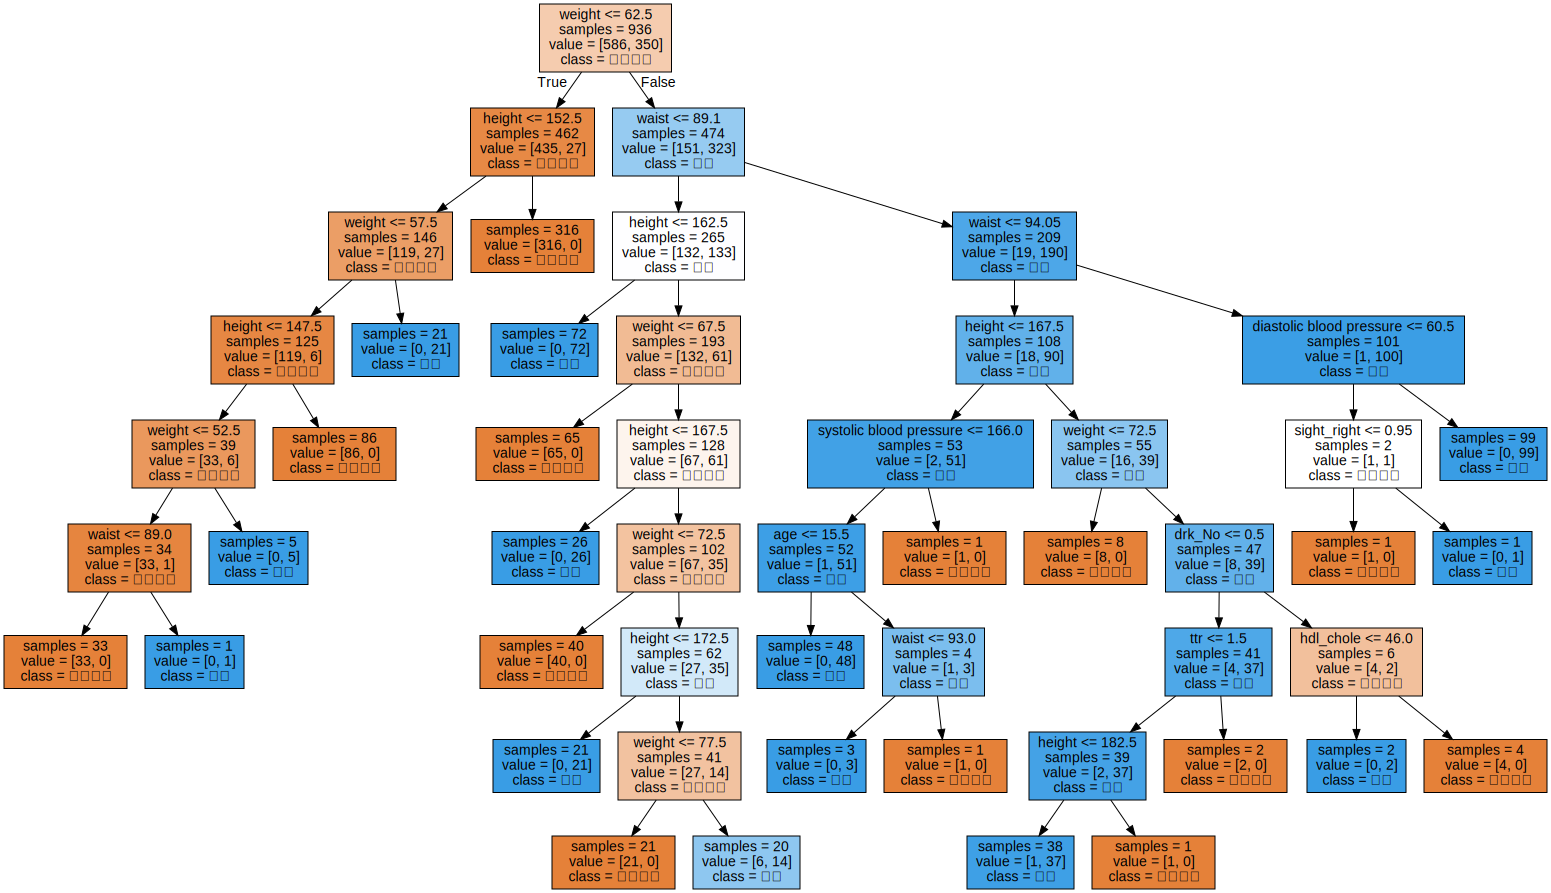

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree_2= DecisionTreeClassifier(max_depth=8, random_state=0)
tree_2.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree_2, out_file="tree.dot", class_names=[ "비만아님", "비만"],
                feature_names=health.columns[0:32], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

**의사결정나무 모델 결과 해석**  
- 가장 상단에 있는 'weight' 변수가 제일 중요한 변수.
- 전체 936개 중에서 586 사례가 비만아님에 해당 이후 462개 중에 435개가 비만아님, 474개 중에서 323개가 비만에 해당과 같이 의사결정나무 모델을 통해서 분류됨.
- 우측 하단 칸에서 4개 중에서 4개가 비만아님이니까 100% 확률로 비만아님이 뜸, 또한 옆에 2개 중에 2개가 비만이니까 100% 확률로 비만이 뜸. 이는 수를 제한하면서 (ex 적어도 샘플이 10개 이상) 정확도를 높일 수 있음.  
>**즉 샘플 개수가 너무 작기에 샘플의 수를 제한하는 min_samples_leaf=k 옵션을 추가해서 더 정확도를 높일 수 있음.**

**min_samples_leaf=10 옵션을 추가한 의사결정나무**  
 * max_depth=8, min_samples_leaf=10

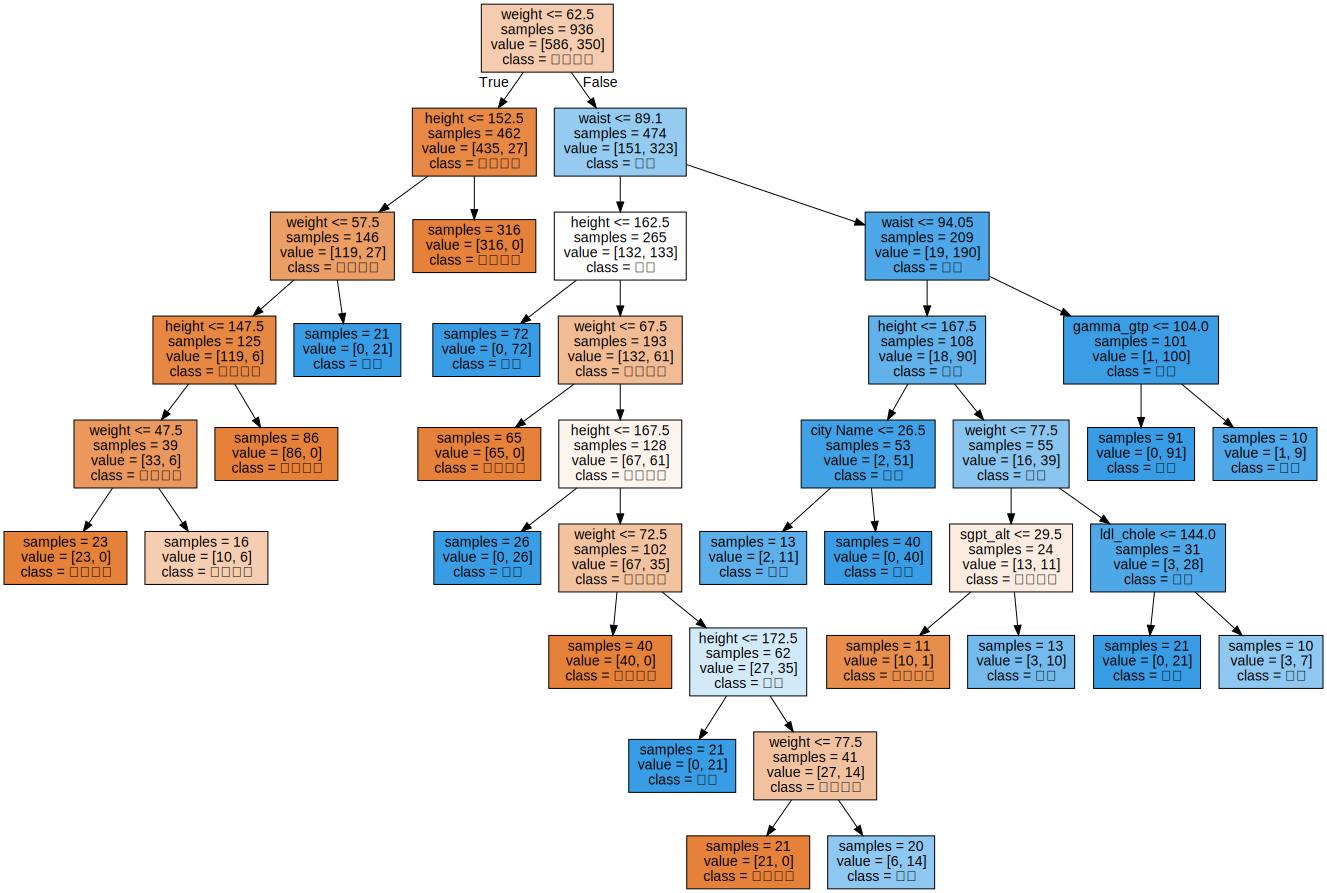

In [ ]:
tree_3= DecisionTreeClassifier(max_depth=8, random_state=0, min_samples_leaf=10) #마지막 잎 노드 최소 10개로 제한 
tree_3.fit(X_train, y_train)

from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree_3, out_file="tree.dot", class_names=[ "비만아님", "비만"],
                feature_names=health.columns[0:32], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#마지막 잎 노드를 최소 10개로 제한하여 정확도를 더 높이게 나온 의사결정나무 모델 

**최적의 파라미터 옵션을 적용한 의사결정나무**  
 * max_depth=8, min_samples_leaf=3

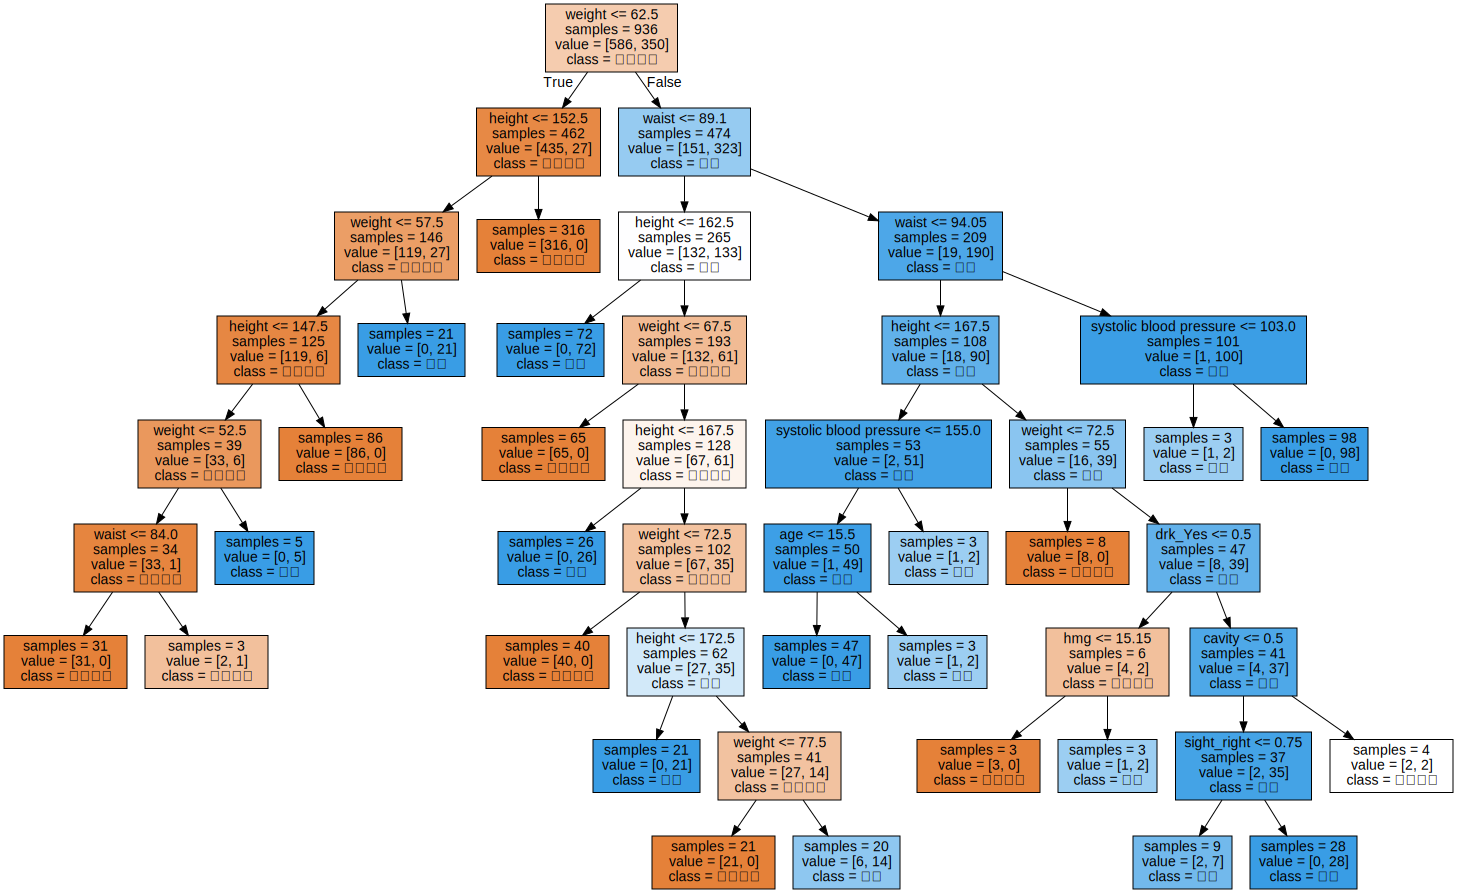

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

tree= DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=0)
tree.fit(X_train, y_train)

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "비만아님", "비만"],
                feature_names=health.columns[0:32], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### **주요 변수들 (features)**

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.00810969 0.         0.         0.         0.
 0.         0.         0.00149895 0.21657176 0.66243373 0.10027692
 0.         0.00160899 0.         0.         0.00287652 0.
 0.         0.         0.         0.         0.         0.00318926
 0.         0.         0.         0.         0.         0.
 0.00343418 0.        ]


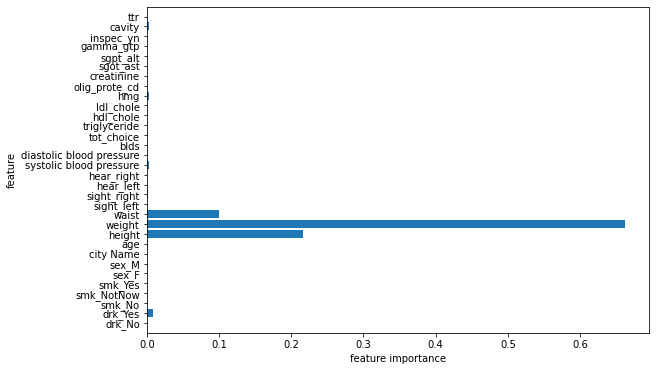

In [ ]:
#위에 변수들에 해당하는 중요도를 더 손쉽게 확인하기 위한 코드(중요도 변수를 시각화)

import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[0:32])  #종속변수를 제외한 나머지 변수들 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')  #x축의 변수명이 길어서 x축과 y축을 바꿔서 보기 편하게 만듦 
    plt.yticks(np.arange(n_features), health.columns[0:32])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree) #위에 지정한 함수 이름을 불러오고 생성한 tree 모델을 함수에 적용 

In [ ]:
res = pd.DataFrame(result)
res["name"] = health.columns[0:32]
res.rename(columns={0:'importance figure'}, inplace=True)
display(res.info())
display(res.sort_values(by='importance figure', ascending=False)) #중요도 수치로 내림차순 정렬

# weight(체중), height(키)의 중요도가 높음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importance figure  32 non-null     float64
 1   name               32 non-null     object 
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes


None

,importance figure,name
10,0.662434,weight
9,0.216572,height
11,0.100277,waist
1,0.008110,drk_Yes
30,0.003434,cavity
23,0.003189,hmg
16,0.002877,systolic blood pressure
13,0.001609,sight_right
8,0.001499,age
25,0.000000,creatinine


# **앙상블 (Ensemble) 모델**

## **랜덤 포레스트 (Random forest)**

In [ ]:
health.columns

Index(['drk_No', 'drk_Yes', 'smk_No', 'smk_NotNow', 'smk_Yes', 'sex_F',
       'sex_M', 'city Name', 'age', 'height', 'weight', 'waist', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'systolic blood pressure',
       'diastolic blood pressure', 'blds', 'tot_choice', 'triglyceride',
       'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd', 'creatinine',
       'sgot_ast', 'sgpt_alt', 'gamma_gtp', 'inspec_yn', 'cavity', 'ttr',
       'BMI', 'Obesity'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


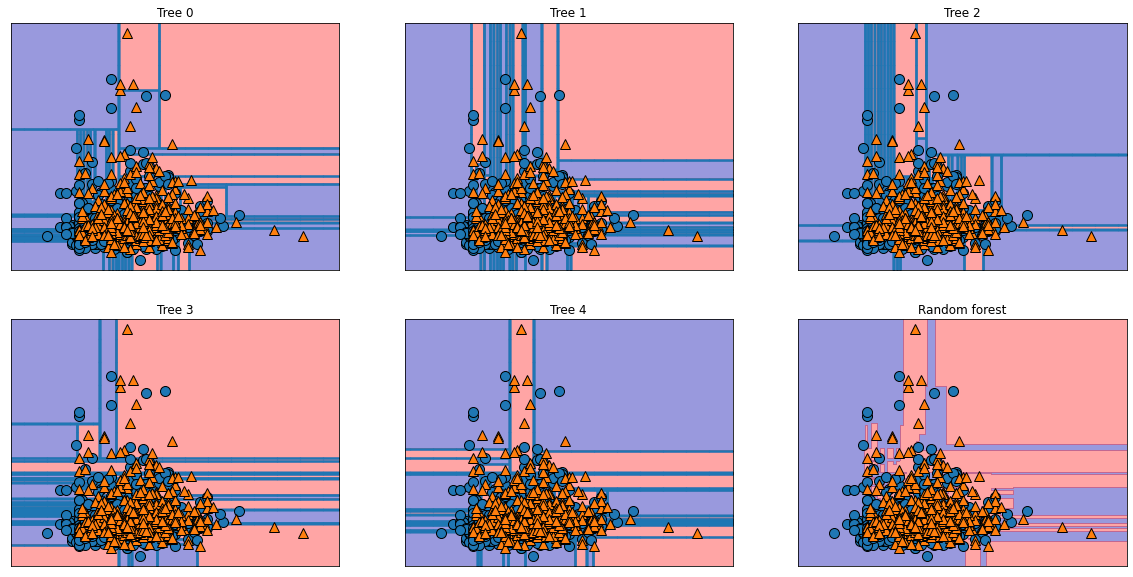

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2) #평균을 구할 전체 나무의 숫자 개수를 5개로 하는 forest 모델 생성 
forest.fit(X_train.iloc[:, 17:19], y_train)  #변수는 17과 18번 째의 'systolic blood pressure', 'diastolic blood pressure' 변수들로만 이용해서 생성 

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 17:19].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 17:19].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 17], X.iloc[:, 18], y)
plt.show()

In [ ]:
# 설정한 독립변수 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0) #100개의 나무를 생성하는 forest 모델을 만듦
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

#단일 의사결정나무 모델보다 시험용 데이터 정확도가 낮아 성능이 별로임, 추가로 학습용 데이터 정확도가 100%라 과적합 문제 발생 

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.891


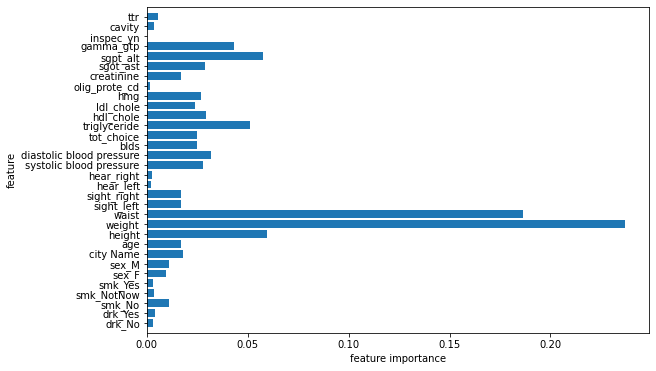

In [ ]:
#단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨

plot_feature_importances_wisc(forest) #위에서 만든 변수의 중요도 확인할 수 있는 함수 불러와서 forest 모델에 적용 

#100번을 했더니 상당히 많은 변수들이 사용이 되었고 중요도가 높은 변수들도 많음 
#단일 의사결정나무 모델과 동일하게 weight의 변수의 중요도가 제일 높음 

## **그래디언트 부스팅 (Gradient Boosting)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)  #디폴트 값으로 옵션을 두고 그래디언트 부스팅을 적용한 gbrt모델 생성
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1(학습률)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

#학습용 데이터가 100이 나와서 과적합 상태

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.997


- 학습용 데이터 세트의 정확도가 100%이므로 과적합임
- 과적합을 막기 위해서 나무의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음

In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)   #max_depth=3인 디폴드 값이 아니라 수를 변경해서 과적합을 방지할 수도 있음 
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.938
시험용 데이터 세트 정확도: 0.930


In [ ]:
#학습률 감소
gbrt_2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)  
gbrt_2.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt_2.score(X_test, y_test)))

#학습률의 값을 줄였더니 오히려 디폴트 값으로 구성된 모델모다 학습용의 정확도와 시험용의 정확도가 떨어짐

학습 데이터 세트 정확도: 0.932
시험용 데이터 세트 정확도: 0.920


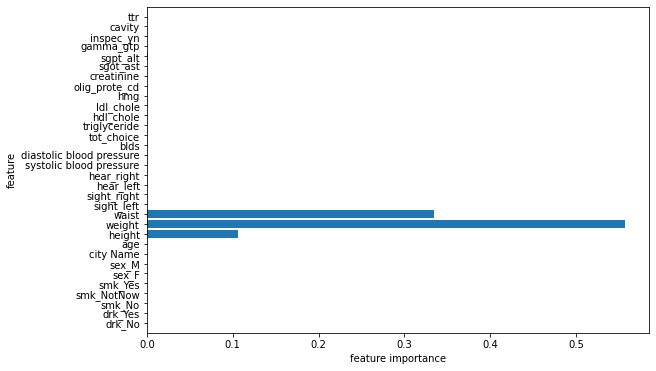

In [ ]:
plot_feature_importances_wisc(gbrt)  #위에서 생성한 중요도를 구하는 함수에 gbrt 모델 적용 

#랜덤포레스트 모델보다는 중요한 변수들의 수가 적음
#의사결정나무, 랜덤포레스트 모델과 동일하게 weight 변수의 중요도가 가장 높음

### **최적의 파라미터: Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

#학습률과 나무 깊이를 순차적으로 변경하게 하는 파라미터 변수를 만들어서 할당 

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)   #가장 최적의 패러미터가 나오면 이 값을 이 모델이 적용시기키 위해 refit=True 설정 
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.913462,45,0.903846,0.929487,0.907051
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.987179,11,1.000000,0.974359,0.987179
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.992521,6,1.000000,0.983974,0.993590
3,"{'learning_rate': 0.1, 'max_depth': 4}",0.992521,6,0.996795,0.983974,0.996795
4,"{'learning_rate': 0.1, 'max_depth': 5}",0.996795,1,1.000000,0.996795,0.993590
5,"{'learning_rate': 0.1, 'max_depth': 6}",0.986111,14,0.993590,0.977564,0.987179
6,"{'learning_rate': 0.1, 'max_depth': 7}",0.971154,26,0.971154,0.961538,0.980769
7,"{'learning_rate': 0.1, 'max_depth': 8}",0.975427,22,0.993590,0.948718,0.983974
8,"{'learning_rate': 0.1, 'max_depth': 9}",0.966880,29,0.977564,0.948718,0.974359
9,"{'learning_rate': 0.1, 'max_depth': 10}",0.959402,36,0.955128,0.948718,0.974359


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

#max_depth=5이고 learning_rate=0.1일 때가 최적의 파라미터

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.9968


In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.997


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=5)   #최적의 파라미터 값을 옵션 값으로 적용
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

#최적의 파라미터로 실행했지만 학습 데이터 정확도가 100%라 과적합 문제 발생 

학습 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.997


# **K-최근접 이웃(K-Nearest Neighbor)모델**

## **RandomSearch**

**Randomsearach로 경향성 파악**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=50)} #랜덤서치에 적용할 n 범위를 1~50으로 설정

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train) #생성한 모델에 학습하기 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4ad4998510>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_)) #최적의 파라미터 n 값은 18 ---> 랜덤이기 때문에 실행할 때마다 값이 다르게 나옴. 
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 18}
Best Cross-validity Score: 0.751
Test set Score: 0.693


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004626,0.000538,0.016092,0.000704,49,{'n_neighbors': 49},0.734043,0.775401,0.716578,0.764706,...,0.739322,0.026868,2,0.747326,0.746328,0.738318,0.744993,0.759680,0.747329,0.006931
1,0.004939,0.000097,0.016638,0.001486,41,{'n_neighbors': 41},0.723404,0.748663,0.721925,0.754011,...,0.728638,0.021148,6,0.744652,0.742323,0.750334,0.735648,0.759680,0.746527,0.008087
2,0.005041,0.000131,0.016473,0.003030,9,{'n_neighbors': 9},0.723404,0.770053,0.727273,0.732620,...,0.731847,0.021103,5,0.779412,0.777036,0.781041,0.783712,0.802403,0.784721,0.009105
3,0.005426,0.000819,0.015912,0.000668,26,{'n_neighbors': 26},0.744681,0.727273,0.732620,0.754011,...,0.732893,0.016408,4,0.755348,0.747664,0.739653,0.755674,0.761015,0.751871,0.007445
4,0.004926,0.000075,0.015973,0.002027,18,{'n_neighbors': 18},0.744681,0.748663,0.754011,0.764706,...,0.751075,0.007763,1,0.762032,0.765020,0.767690,0.775701,0.778371,0.769763,0.006260
5,0.006068,0.002168,0.015499,0.000969,14,{'n_neighbors': 14},0.744681,0.743316,0.716578,0.732620,...,0.735032,0.010166,3,0.767380,0.771696,0.770360,0.767690,0.783712,0.772168,0.005995
6,0.005391,0.000984,0.014888,0.000332,5,{'n_neighbors': 5},0.707447,0.727273,0.748663,0.732620,...,0.723308,0.017410,9,0.831551,0.827770,0.822430,0.814419,0.811749,0.821584,0.007568
7,0.005724,0.001610,0.016842,0.001177,39,{'n_neighbors': 39},0.718085,0.754011,0.716578,0.748663,...,0.725435,0.023476,7,0.741979,0.739653,0.747664,0.735648,0.761015,0.745191,0.008816
8,0.004884,0.000068,0.013659,0.000230,2,{'n_neighbors': 2},0.670213,0.711230,0.689840,0.663102,...,0.693401,0.025785,10,0.844920,0.817089,0.831776,0.830441,0.843792,0.833603,0.010178
9,0.004888,0.000080,0.016308,0.001302,39,{'n_neighbors': 39},0.718085,0.754011,0.716578,0.748663,...,0.725435,0.023476,7,0.741979,0.739653,0.747664,0.735648,0.761015,0.745191,0.008816


In [ ]:
df_sample=pd.DataFrame(result_random)
df_sample=df_sample.sort_values('param_n_neighbors')  #param_n_neighbors 기준으로 정렬 

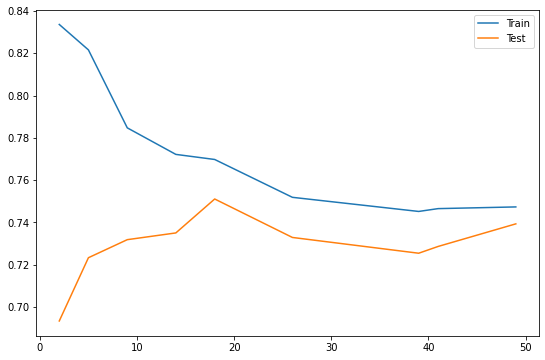

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_train_score'], label="Train")
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_test_score'], label="Test")
plt.legend()  

**n값을 1~50으로 설정하여 random search 한 결과 20 이후 부터 점차 하락하는 경향을 보인다.**

## **GridSearch**

**random search의 경향성에 따라 범위 설정**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n = 20  # n=20 이후 부터 하락하는 경향이었으니 범위를 20까지 제한 
param_list = []
for i in range(1, n+1):
  param_list.append(i)

param_grid={'n_neighbors': param_list}

In [ ]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 17}
Best Cross-validity Score: 0.757
Test set Score: 0.709


**n_neigbors=17 일 때가 최적의 파라미터**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn17=KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn17.fit(X_train, y_train) #n_neighbors=17일 때의 모델을 생성해서 적용 

KNeighborsClassifier(n_neighbors=17)

In [ ]:
print("학습 데이터 세트 정확도: {:.3f}".format(knn17.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(knn17.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.781
시험용 데이터 세트 정확도: 0.709


# **적절한 평가 방법 채택**

**각 모델마다 최적의 파라미터를 적용한 옵션을 추가하여 정확도(성능) 비교**

- 의사결정나무: max_depth=8, min_samples_leaf=3 
- 랜덤포레스트 : n_estimators=100
- 그래디언트 부스팅: max_depth=1   
  * Grid search=max_depth=5, learning_rate=0.1 --> 과적합 유발
- K-최근접 이웃: n_neighbors=17 

In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5 

tree= DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=0)
tree.fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)   
gbrt.fit(X_train, y_train)

knn17=KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')  
knn_scores= cross_val_score(knn17, X_train, y_train, cv=10, scoring='accuracy' )

print("="*50)
print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 
print("K-Nearest Neighbor: ", knn_scores)  

print("="*50)
print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 
print("K-Nearest Neighbor :{:.3f}".format(knn_scores.mean())) 

Accuracy
Decision tree:  [0.9787234  1.         1.         0.92553191 0.92553191 0.95744681
 0.97849462 0.96774194 0.97849462 0.97849462]
Random forest:  [0.86170213 0.91489362 0.86170213 0.90425532 0.87234043 0.91489362
 0.89247312 0.91397849 0.91397849 0.8172043 ]
Gradient boosting:  [0.88297872 0.96808511 0.89361702 0.94680851 0.89361702 0.95744681
 0.92473118 0.91397849 0.92473118 0.84946237]
K-Nearest Neighbor:  [0.67021277 0.80851064 0.78723404 0.71276596 0.74468085 0.76595745
 0.74193548 0.77419355 0.78494624 0.69892473]
Accuracy mean
Decision tree :0.969
Random forest :0.887
Gradient boosting :0.916
K-Nearest Neighbor :0.749


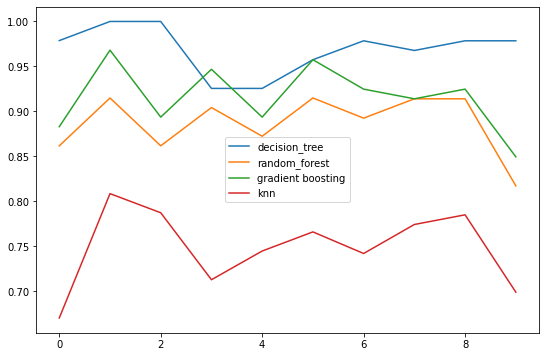

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient boosting', gbrt_scores],
            ['knn', knn_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()


**시각화 결과를 통해서 의사결정나무의 성능이 제일 높은 것으로 나타남**

**ROC (Receiver Operator Characteristic) 곡선과 AUC (Area Under the Curve) 비교**

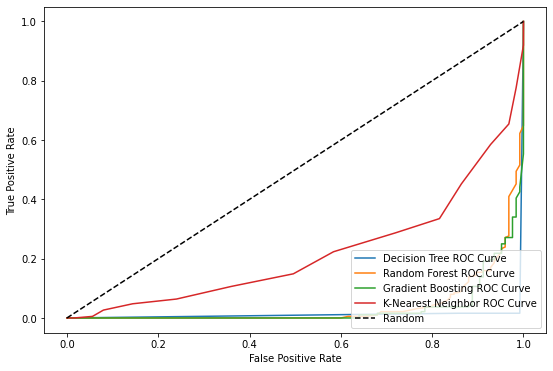

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1], pos_label="N")
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1], pos_label="N")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, gbrt.predict_proba(X_test)[:, 1], pos_label="N")
fpr_knn, tpr_knn, cutoff_knn = roc_curve(y_test, knn17.predict_proba(X_test)[:, 1], pos_label="N")

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbor ROC Curve")

plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)  
plt.show() 

In [ ]:
auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, gbrt.predict_proba(X_test)[:, 1])
auc_knn = roc_auc_score(y_test, knn17.predict_proba(X_test)[:, 1])

print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) 
print("K-Nearest Neighbor의 AUC: {:.3f}".format(auc_knn))



Decision Tree의 AUC: 0.987
Random Forest의 AUC: 0.958
Gradient Boosting의 AUC: 0.967
K-Nearest Neighbor의 AUC: 0.781


**시각화와 수치 값 결과를 통해서 의사결정나무 모델이 ROC 곡선의 아래 면적이 제일 크고, AUC의 값이 제일 커서 가장 우수한 모델로 나타남**

## **결과: 의사결정나무 (Decision tree) 모델**

# **의사결정나무 평가 및 인사이트**

## **정오 분류표 (Confusion matrix)**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
tree_pred = tree.predict(X_test) #생성한 모델에 적용한 예측값
print(y_test.value_counts()) # y_test의 N(비만아님), Y(비만)의 분포 
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, tree_pred)))
print("테스트 데이터 오차행렬:\n", confusion_matrix(y_test, tree_pred))  #실제값과 예측값의 오차행렬 

N    188
Y    125
Name: Obesity, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.981
테스트 데이터 오차행렬:
 [[185   3]
 [  3 122]]


In [ ]:
print('정밀도:{:.3f}'.format(precision_score (y_test, tree_pred, average='binary', pos_label="N")))  # pos_label = 1 기본값
print('TP (185) / TP+FP (188) = {:.3f}'.format(185/188))
print('재현율:{:.3f}'.format(recall_score(y_test, tree_pred, average='binary', pos_label="N")))
print('TP (185) / TP+FN (188) = {:.3f}'.format(185/188))
print('f1-measure:{:.3f}'.format(f1_score(y_test, tree_pred, average='binary', pos_label="N")))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.984*0.984/(0.984+0.984)))

정밀도:0.984
TP (185) / TP+FP (188) = 0.984
재현율:0.984
TP (185) / TP+FN (188) = 0.984
f1-measure:0.984
2*(정밀도*재현율)/(정밀도+재현율) = 0.984


In [ ]:
from sklearn.metrics import classification_report 

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, tree_pred))

Decision Tree:
              precision    recall  f1-score   support

           N       0.98      0.98      0.98       188
           Y       0.98      0.98      0.98       125

    accuracy                           0.98       313
   macro avg       0.98      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313



- 정확도가 98% 로 높은 수치가 나왔으며 모델의 성능이 좋은 것으로 나타났다.  

- class별 점수의 평균과 클래스의 샘플 수로 가중평균한 값들이 각각 98%로 높은 수치가 나왔다.  

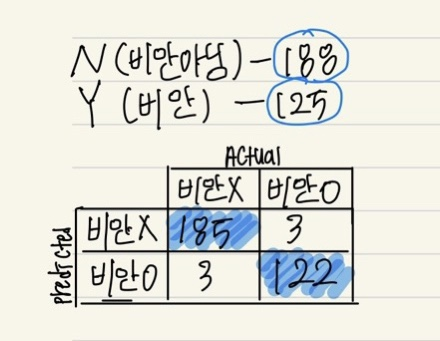
- 비만이 아니라고 예측했는데 실제 비만이 아닌 경우는 185개, 비만인 경우는 3개/ 비만이라고 예측했는데 실제 비만인 경우는 122개, 비만이 아닌 경우는 3으로 선정한 모델의 분류 성능은 우수하다고 말할 수 있다.

## **모델 정확도와 시각화 총 정리**

In [ ]:
tree= DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=0)  #최적의 파라미터 옵션--> max_depth=8, min_samples_leaf=3 
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.984
시험용 데이터 정확도: 0.981


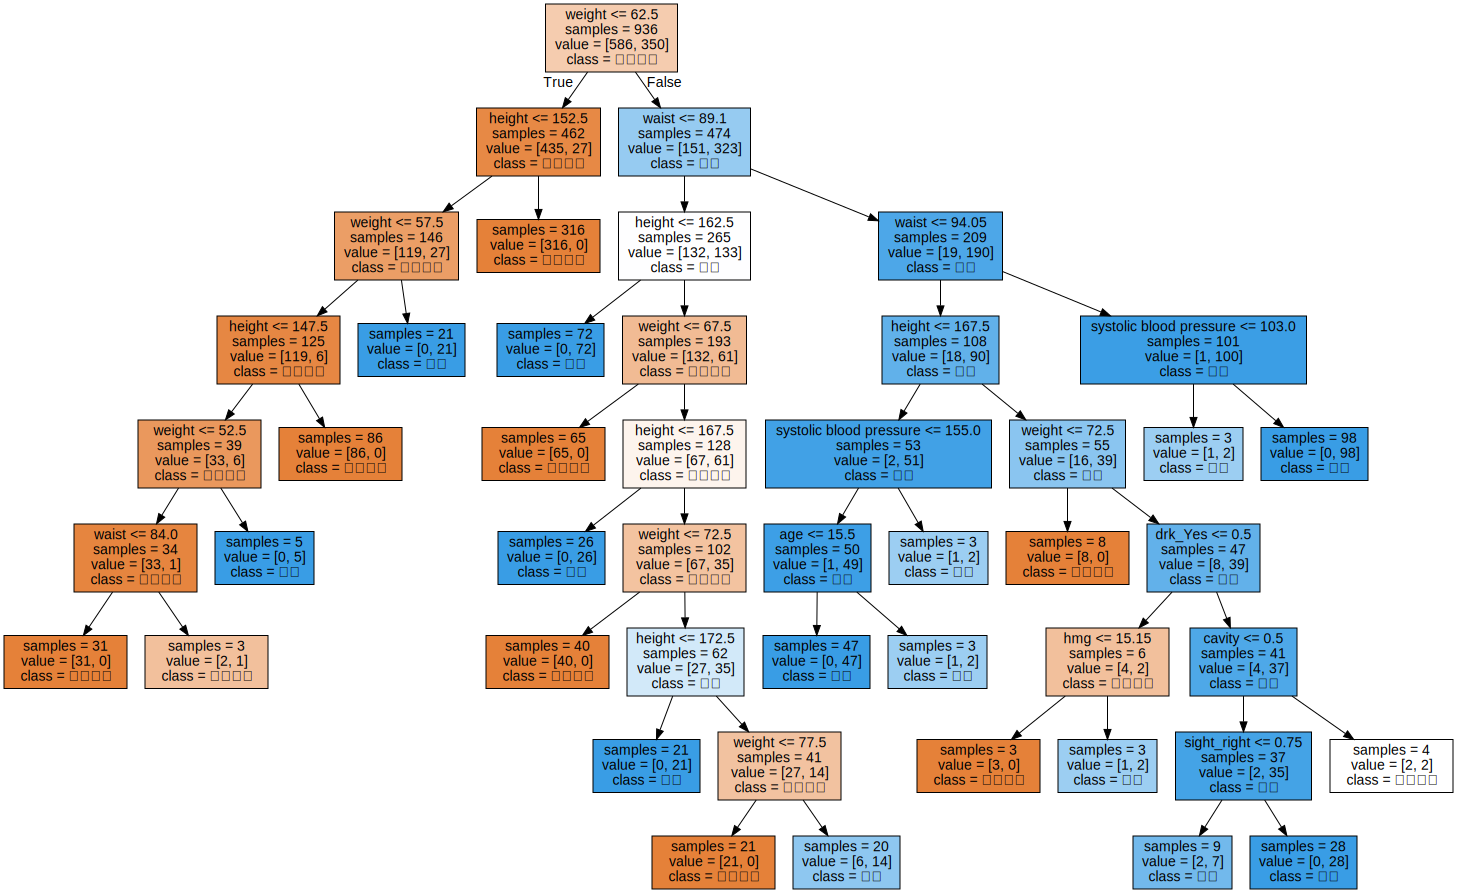

In [ ]:
export_graphviz(tree, out_file="tree.dot", class_names=[ "비만아님", "비만"],
                feature_names=health.columns[0:32], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

**일정 조건을 기준으로 '비만'과 '비만아님'으로 분류되는 의사결정나무 모델을 보여줌**
- 가장 상단에 있는 'weight' 변수가 제일 중요한 변수
- 전체 936개 중에서 586 사례가 비만아님에 해당, 이후 462개 중에 435개가 비만아님, 474개 중에서 323개가 비만에 해당과 같이 의사결정 규칙(Decision rule)을 나무구조로 도표화하여 관심대상이 되는 집단인 '비만아님'과 '비만'집단을 소집단으로 조건에 따라서 분류함.
- 우측 하단 칸에서 28개 중에서 28개가 비만이니까 100% 확률로 비만이 뜸. 



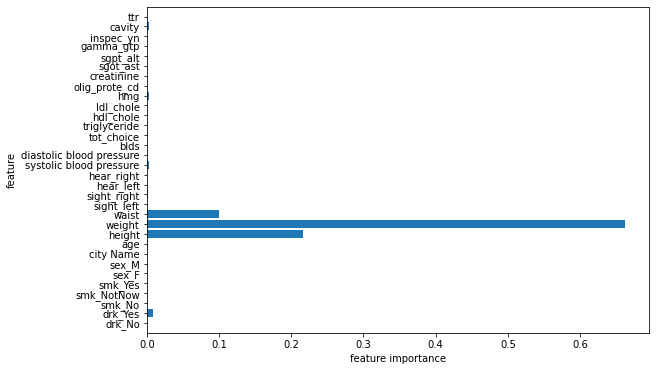

In [ ]:
plot_feature_importances_wisc(tree)

## **인사이트**

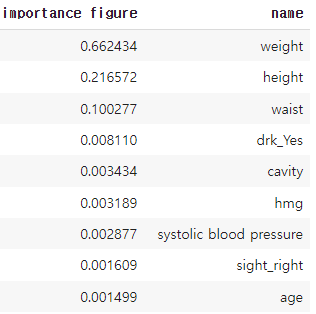


- max_depth=8, min_samples_leaf=3으로 설정하여 생성한 의사결정나무 모델에서 가장 중요한 변수는 weight(체중)이고 height(키), waist(허리둘레) 순으로 중요한 것으로 나타났다.   

- 음주(yes), 충치, 혈색소, 수축기혈압, 시력(우), 나이 변수도 일정 부분 종속변수 '비만여부' 분류에 영향을 끼치는 것으로 나타났다. (단 나이 변수는 값 자체가 수치 값이 아니라 연령대를 기준으로 분류하여 정수 그룹으로 표현했기 때문에 실질적으로 영향x)  

- 중요도가 0이라고 해서 항상 중요하지 않다고 말할 수 없다. 의사결정나무를 생성하는데 어떤 변수가 중요도가 높은지는 알 수 있지만, 비만아님을 지지하는지 비만을 지지하는지는 알 수 없다.  

- 결정적으로 BMI(비만도)에 큰 영향을 주는 변수는 체중과 키로 드러났는데, 이는 애초에 BMI(비만도) 변수가 키와 체중 관계에서 파생되었기 때문이다. 즉 비만여부는 키와 체중의 비율에 따라서 달라진다고 볼 수 있다. 

- BMI(=몸무게/키^2)가 25 이상이면 '비만', 25 미만이면 '비만아님' 이기 때문에 비만을 방지하기 위해서는 몸무게를 줄이거나 키가 커지면 되는데, 현실적으로 키가 커지는 것보다 체중을 줄이는 방법이 더 용이하다. 규칙적인 운동과 건강한 식습관으로 체중을 조절하여 비만을 예방할 수 있다. 



